# **Exploratory Data Analysis on Company Datasets**
![](https://i.imgur.com/JXH6Qww.png)


**What is Exploratory Data Analysis?**

Exploratory data analysis (EDA for short) is what data analysts do with large sets of data, looking for patterns and summarizing the dataset’s main characteristics beyond what they learn from modeling and hypothesis testing. EDA is a philosophy that allows data analysts to approach a database without assumptions. When a data analyst employs EDA, it’s like they’re asking the data to tell them what they don’t know. 

It is an approach to data analysis, that uses these techniques:

- Maximize insights into a dataset.
- Uncover underlying structures.
- Extract important variables.
- Detect outliers and anomalies.
- Test underlying assumptions.
- Determine optimal factor settings.


## **Outline of Project**

* **Select and download real-world dataset**
* **Import and Install all the libraries**
* **Perform data preparation & cleaning**
* **Ask & answer questions about the data**
* **Perform exploratory analysis & visualization**
* **Summarize your inferences & write a conclusion**


## **Select and download real-world dataset**

This dataset is available on Kaggle. It contains information about the 7 million companies around the world. It includes the information about the companies in which year it is established, employees status, countries, and cities where these companies are spread. We will analyze this dataset and draw some conclusions.


Dataset Link - https://www.kaggle.com/peopledatalabssf/free-7-million-company-dataset

**Downloading the Dataset**

Let's download the data into the Jupyter notebook. We'll use the **opendatasets library** from Jovian. Let's install and import it, and use the download method.

Use the "Run" button to execute the code.

In [4]:
!pip install jovian --upgrade --quiet
import jovian
# Execute this to save new versions of the notebook
jovian.commit(project="7-million-company-datasets")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pankajthakur3999/eda-company-datasets


'https://jovian.ai/pankajthakur3999/eda-company-datasets'

In [6]:
# Install opendatsets library to downlaod the data from kaggle by using link of the data
!pip install opendatasets --upgrade --quiet
import opendatasets as od 

#Kaggle Dataset URL
datasets_url = 'https://www.kaggle.com/peopledatalabssf/free-7-million-company-dataset'

# Downloading the dataset
od.download(datasets_url)

Skipping, found downloaded files in "./free-7-million-company-dataset" (use force=True to force download)


In [7]:
# Convert dataset into CSV file
datasets_url_to_csv = '/content/free-7-million-company-dataset/companies_sorted.csv'

## **Import and Install all the Libraries**

In [9]:
!pip install jovian pandas-profiling numpy plotly --upgrade --quiet
!pip install pyyaml==5.4.1 --quiet
!pip3 uninstall statsmodels -y --quiet
!pip3 install statsmodels==0.10.0rc2 --pre --user --quiet

In [10]:
# Python Data Analysis Library
import pandas as pd 

# NumPy is the fundamental package for scientific computing in Python
import numpy as np

# Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy
import matplotlib.pyplot as plt

# It sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

# Seaborn is a library for making statistical graphics in Python.
import seaborn as sns

# Plotly Express is a new high-level Python visualization library
import plotly.express as px

#The plotly.figure_factory module contains dedicated functions for creating very specific types of plots
import plotly.figure_factory as ff

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## **Data Preparation and Cleaning**

* Load the dataset into a data frame using Pandas
* Explore the number of rows & columns, ranges of values etc.
* Handle missing, incorrect and invalid datay of the missing values or drop the values

### Loading Dataset

Laoding datasets using `DataFrame.read_csv()`

In [11]:
# Load the datasets using pandas
companies_datasets = pd.read_csv(datasets_url_to_csv)

# Get the dataframe
companies_datasets.head()

,Unnamed: 0,name,domain,year founded,industry,size range,locality,country,linkedin url,current employee estimate,total employee estimate
0,5872184,ibm,ibm.com,1911.0,information technology and services,10001+,"new york, new york, united states",united states,linkedin.com/company/ibm,274047,716906
1,4425416,tata consultancy services,tcs.com,1968.0,information technology and services,10001+,"bombay, maharashtra, india",india,linkedin.com/company/tata-consultancy-services,190771,341369
2,21074,accenture,accenture.com,1989.0,information technology and services,10001+,"dublin, dublin, ireland",ireland,linkedin.com/company/accenture,190689,455768
3,2309813,us army,goarmy.com,1800.0,military,10001+,"alexandria, virginia, united states",united states,linkedin.com/company/us-army,162163,445958
4,1558607,ey,ey.com,1989.0,accounting,10001+,"london, greater london, united kingdom",united kingdom,linkedin.com/company/ernstandyoung,158363,428960


### Information about datset using `DataFrame.info()`

The info() method prints information about the DataFrame.

The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [12]:
# Check the datasets info
companies_datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7173426 entries, 0 to 7173425
Data columns (total 11 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Unnamed: 0                 int64  
 1   name                       object 
 2   domain                     object 
 3   year founded               float64
 4   industry                   object 
 5   size range                 object 
 6   locality                   object 
 7   country                    object 
 8   linkedin url               object 
 9   current employee estimate  int64  
 10  total employee estimate    int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 602.0+ MB


**Here we can see**

- Datatype of each columns which is int64, object, and float
- Number of rows is 7173426.
- Number of columns is 11
- File size after loading the datset 602.0+ MB.

Now we have a rough idea of our datset and we can further procees for analysis

### Description about the datasets using `DataFrame.describre()`

The describe() function is used to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

It is used to view some basic statistical details like percentile, mean, std etc



In [13]:
# Description of datasets
companies_datasets.describe()

,Unnamed: 0,year founded,current employee estimate,total employee estimate
count,7.173426e+06,3.566446e+06,7.173426e+06,7.173426e+06
mean,3.586712e+06,2.001747e+03,1.387121e+01,3.225438e+01
std,2.070790e+06,2.096627e+01,3.545919e+02,8.741556e+02
min,0.000000e+00,1.451000e+03,0.000000e+00,1.000000e+00
25%,1.793356e+06,1.999000e+03,1.000000e+00,1.000000e+00
50%,3.586712e+06,2.009000e+03,1.000000e+00,2.000000e+00
75%,5.380069e+06,2.013000e+03,4.000000e+00,7.000000e+00
max,7.173425e+06,2.103000e+03,2.740470e+05,7.169060e+05


### Dropping the columns

In [14]:
# Check all the columns of dataset
companies_datasets.columns

Index(['Unnamed: 0', 'name', 'domain', 'year founded', 'industry',
       'size range', 'locality', 'country', 'linkedin url',
       'current employee estimate', 'total employee estimate'],
      dtype='object')

In [15]:
# Let's drop the columns which are not of our use (Unnamed: 0, domain, linkedin url, year founded)
new_datasets = companies_datasets.drop(['Unnamed: 0','domain','size range', 'linkedin url'], axis =1)

# Get the dataframe
new_datasets.head(3)

,name,year founded,industry,locality,country,current employee estimate,total employee estimate
0,ibm,1911.0,information technology and services,"new york, new york, united states",united states,274047,716906
1,tata consultancy services,1968.0,information technology and services,"bombay, maharashtra, india",india,190771,341369
2,accenture,1989.0,information technology and services,"dublin, dublin, ireland",ireland,190689,455768


In [16]:
new_datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7173426 entries, 0 to 7173425
Data columns (total 7 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   name                       object 
 1   year founded               float64
 2   industry                   object 
 3   locality                   object 
 4   country                    object 
 5   current employee estimate  int64  
 6   total employee estimate    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 383.1+ MB


* Here we can see that after dropping few columns our file size is reduced from 602.0+ MB to 383.1+ MB.
* We can drop and select columns according to our convenience of analysis

In [18]:
len(new_datasets.country.unique())

237

In [19]:
len(new_datasets.industry.unique())

149

In [20]:
len(new_datasets.name.unique())

7004635

In [21]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pankajthakur3999/eda-company-datasets


'https://jovian.ai/pankajthakur3999/eda-company-datasets'

### Dealing with Null Values

* We can use `DataFrame.isnull()` to check the null values
* We can use `DataFrame.isnull().sum()` to get the sum of all null values

In [22]:
# Check the total null values in dataset
new_datasets.isnull().sum()

name                               3
year founded                 3606980
industry                      290003
locality                     2508825
country                      2349207
current employee estimate          0
total employee estimate            0
dtype: int64

###  **1.What is the percentage of null values and plot a chart for null values?**

In [23]:
# Let's get the percentage of Null values
null_perceentages = new_datasets.isna().sum().sort_values(ascending=False) / len(new_datasets) * 100
null_perceentages

year founded                 50.282529
locality                     34.973874
country                      32.748745
industry                      4.042741
name                          0.000042
current employee estimate     0.000000
total employee estimate       0.000000
dtype: float64

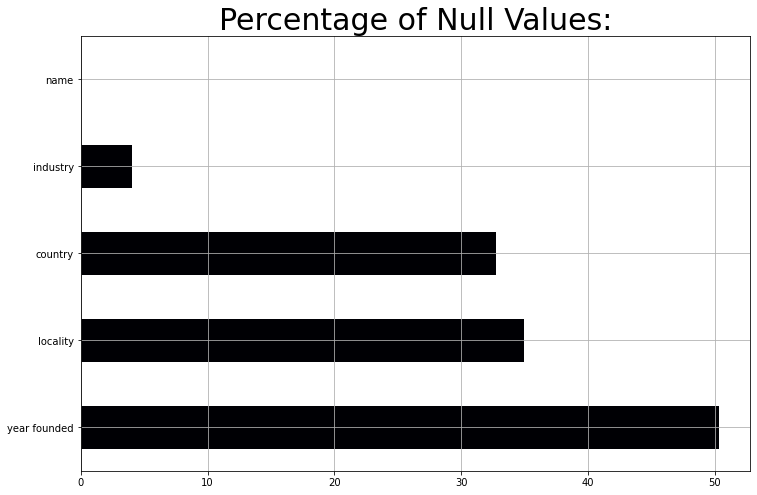

In [24]:
# Plot a bar chat to see the missing peercentage
plt.title("Percentage of Null Values:" , fontsize=30)
null_perceentages[null_perceentages != 0].plot(figsize=(12,8),kind='barh',grid=True,cmap='inferno');

Here we can see year founded is missing around 50% of data and locality is having 34% of missing data.

* So let's drop all the missing year from the datsets and perform some analysis on column `['year founded']`.

## **Ask and Answer Questions About the Data**

* How is the distribution of companies been over the years?
* How is the distribution of selected countries looks like that is evolved over the years?
* Plot a scatter plot to get an idea of how the industries evolved over the year after 1800 in a different country?
* Which is the company having the most spread?
* What are the top 15 countries where the companies are higher?
* What are the top 10 industries around the world?
* How are the different industries are distributed over the selected countries and industries?
* Which country has more number of IT industries with more number of employees?
* Which city has more number of IT industries with more number of employees within the country?
* Visualize the data of all countries using Folium Map?

## **Exploratory Data Analysis (EDA)**

We will perform EDA by taking sample of 10,000 rows of data.
 
Why sampling is important?

Sampling can be particularly useful with data sets that are too large to efficiently analyze in full. Identifying and analyzing a representative sample is more efficient and cost-effective than surveying the entirety of the data. It saves our time also.



In [25]:
# Make some changes in dataframe

# Renaming the columns
new_datasets = new_datasets.rename(columns={"year founded": "year_founded","current employee estimate":"current_employee_estimate","total employee estimate":"total_employee_estimate"})

# Convert strings in the Series/Index to titlecase.
new_datasets.country = new_datasets.country.str.title()
new_datasets.industry = new_datasets.industry.str.title()

### **Analyzing column `[year_founded]`**

Let's make the copy of dataset using `df.copy()` function.

In [26]:
# Let's make a copy
copied_dataset = new_datasets.copy()

# Drop all the Null Values
copied_df = copied_dataset.dropna()

# Convert the data data into CSV file
copied_df.to_csv('copied_df.csv')

# Let's take sample of 10000 rows to perform analysis
copied_df_sample = pd.read_csv('copied_df.csv',index_col = 0, nrows=10000)

###  **2.How is the distribution of companies is looking based on the year founded?**

To get an idea how our companies distribution looks like over the years we need to plot histogram.

- A histogram is the most commonly used graph to show frequency distributions. 
- A frequency distribution shows how often each different value in a set of data occurs
- It helps us to see the shape of the data’s distribution, especially when determining whether the output of a process is distributed approximately normally.
- It helps us to see  whether a process change has occurred from one time period to another.

In [27]:
# Convert the float into int
copied_df_sample["year_founded"]  = copied_df_sample["year_founded"].astype(int)

# Let's plot histogram
x = copied_df_sample["year_founded"]
hist_data = [x]
group_labels = ['distplot']

fig = ff.create_distplot(hist_data, group_labels,curve_type = 'normal',bin_size=5)
fig.update_layout(template="plotly_dark",title='Distribution of companies over year')

fig.show()

In [28]:
# Calculate the Mean
print("Mean of the year",copied_df_sample['year_founded'].mean())

# Calculate the Median
print("Median of the year",copied_df_sample['year_founded'].median())

Mean of the year 1953.3114
Median of the year 1968.0


**Insights from above chart**

* Here we can see from the chart, that most of the countries are established around 1946 to 2006 around the world.
* Our chart is showing left-skewed distribution.
* A "skewed left" distribution is one in which the tail is on the left side.
* If the histogram is skewed left, the mean is less than the median. Here our mean is somewhere around 1953 and median is 1968.
* It is because skewed-left data(year_founded) have a few small values that drive the mean downward but do not affect where the exact middle of the data is (that is, the median)

###  **3.How are the different industries scatterd in a country?**

Why are scatter plots so important?

* Scatter plots' primary uses are to observe and show relationships between two numeric variables. 
* It is useful for identifying patterns in data.

But in our case only the y-axis is numeric(year from 1800).

So how to read the below chart.

To read the below chart click on the dropdown of country(left corner of the chart). It will show you how that industries have grown in that country from year 1800 to 2016.

In [29]:
import os
import plotly.graph_objects as go
copied_df_sample = copied_df_sample[copied_df_sample.year_founded > 1800]

earth = sorted(set(copied_df_sample["country"]))

fig=go.Figure()

region_plot_names = []
buttons=[]

default_state = "India"

for region_name in earth:
  region = copied_df_sample[(copied_df_sample["country"]==region_name)]
  fig.add_trace(go.Scatter(x=region["industry"], y=region["year_founded"], line={},mode='markers', visible=(region_name==default_state)))
  region_plot_names.extend([region_name])

for region_name in earth:
    buttons.append(dict(method='update',
                        label=region_name,
                        args = [{'visible': [region_name==r for r in region_plot_names]}]))

# Add dropdown menus to the figure
fig.update_layout(showlegend=False, updatemenus=[{"buttons": buttons, "direction": "down", "active": earth.index(default_state), "showactive": True, "x": 0.8, "y": 1.50}])


                  

fig.update_layout(template="plotly",title='<b>Industries evloved over the years</b>',
                 yaxis_title='<b>Year from 1800 to 2016</b>',
                 xaxis_title="<b>Industry</b>")

fig.show()

**Insights from above scatter plot**
- For example, click on the `United States` from the dropdown. It will show the trend in different industries. the `military` has started at the earliest(i.e 1800) but the `e-learning` has started around 1918.

### **4.How are the industries scattered in different countries over the years?**

In [30]:
copied_df_sample = copied_df_sample[copied_df_sample.year_founded > 1800]

Industry = sorted(set(copied_df_sample["industry"]))

fig=go.Figure()

region_plot_names = []
buttons=[]

default_state = "Insurance"

for region_name in Industry:
  region = copied_df_sample[(copied_df_sample["industry"]==region_name)]
  fig.add_trace(go.Scatter(x=region["country"], y=region["year_founded"], line={},mode='markers', visible=(region_name==default_state)))
  region_plot_names.extend([region_name])

for region_name in Industry:
    buttons.append(dict(method='update',
                        label=region_name,
                        args = [{'visible': [region_name==r for r in region_plot_names]}]))

# Add dropdown menus to the figure
fig.update_layout(showlegend=False, updatemenus=[{"buttons": buttons, "direction": "down", "active": Industry.index(default_state), "showactive": True, "x": 0.8, "y": 1.50}])


                  

fig.update_layout(template="plotly",title='<b>Industries evloved over the years</b>',
                 yaxis_title='<b>Year from 1800 to 2016</b>',
                 xaxis_title="<b>Industry</b>")

fig.show()

**Insights from above chart**
- For example click on the `Financial Services` from the dropdown of industry. You will see in `United States` it is started in early 1800 but in `India` it is started around 1887.

###  **5.How does the distribution of selected countries looks like that has evolved over the years?**

What is bar plot?

- Bar graphs are an extremely effective visual to use in presentations and reports. They are popular because they allow the reader to recognize patterns or trends far more easily than looking at a table of numerical data. Further, Bar graphs are an effective way to compare items between different groups.
- Here we will select few countries and compare how these countries has grown companies in their country over the period of year.

In [31]:
# Selecting 5 countries
countries = ['Canada','United Kingdom','India','France']

# Making a new dataframe using .loc and .isin
new_country_df = copied_df_sample.loc[copied_df_sample['country'].isin(countries)]

# Sort the country
new_country_df.sort_values(by='country',ascending=False,inplace=True)

In [49]:
years=list(set(new_country_df[new_country_df['country']=='India']['year_founded']) & set(new_country_df[new_country_df['country']=='United Kingdom']['year_founded']) & set(new_country_df[new_country_df['country']=='India']['year_founded']) & set(new_country_df[new_country_df['country']=='France']['year_founded']))

new_country_year_df=new_country_df.loc[new_country_df['year_founded'].isin(years)]


df = new_country_year_df.sort_values(by = 'year_founded',ascending = True)
fig = px.bar(df, 
           x="country", 
           y="total_employee_estimate",
           color="country",
           animation_frame="year_founded", range_y=[500, 30000])

fig.update_layout(template="plotly",title='<b>Trends in employees in different year</b>',
                 yaxis_title='<b>Number of Emploees</b>')
fig.show()

**Observation from the chart**
* From the animation, we can see in 1859, In India employees were 1932 but in Canada employees were 17k. It is beacuase in 1859 Canada was having more industries where people were working compare to India.

In [33]:
# Let's drop the column year_founded
data_drop_year = new_datasets.drop(['year_founded'], axis =1)

# Drop all the null values
Data = data_drop_year.dropna()

# Convert the dataframe to CSV
Data.to_csv('Data.csv')

# Let's take a sample of 10,000 rows
sample_df = pd.read_csv('Data.csv',index_col = 0, nrows=10000)

In [44]:
len(sample_df.country.unique())

101

In [46]:
len(sample_df.industry.unique())

141

In [47]:
len(sample_df.name.unique())

9930

### **Analyze column `['name']`**

Column`['name']` contain the name of comapnies. Let's plot a word cloud.

What is a word cloud?

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

In [34]:
# How many unique countries are there in sample data

len(sample_df.name.unique())

9930

* Here we can see there is 9930 unique company name out of 10000. Let's check which 70 company is repeating.

###  **6.Which company has the most spread around the world?**

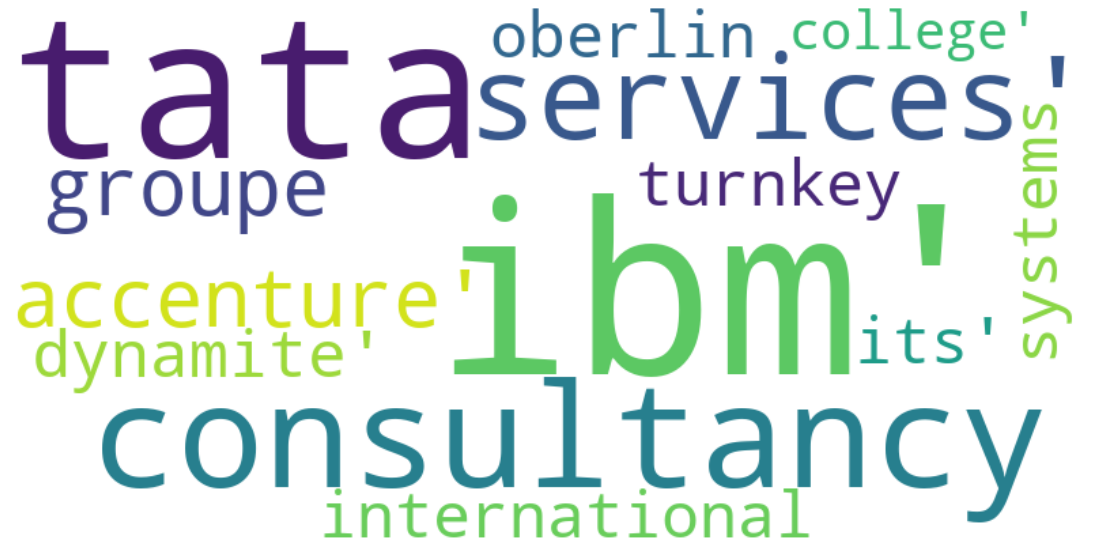

In [35]:
# Generate a word cloud image to check the spread of diiferent company
from PIL import Image
from wordcloud import WordCloud
text = sample_df['name'].values
wordcloud = WordCloud(width=800, height=400, background_color='white',).generate(str(text))
# Display the generated image:
# the matplotlib way:


plt.figure( figsize=(25,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

**Insights from the word cloud**
* From the above word cloud, we can analyze that IBM, tata, Accenture is having more companies.

###  **Analyze column `['country']`**

In [36]:
# What is number of unique countries?
len(sample_df.country.unique())

101

* There are 101 unique countries in the sample.

In [37]:
# Let's print the country name
sample_df.country.unique()

array(['United States', 'India', 'Ireland', 'United Kingdom', 'Germany',
       'Finland', 'France', 'Sweden', 'Netherlands', 'Switzerland',
       'China', 'Canada', 'Spain', 'Brazil', 'Saudi Arabia', 'Australia',
       'Turkey', 'Czechia', 'United Arab Emirates', 'South Korea',
       'South Africa', 'Mexico', 'Taiwan', 'Japan', 'Belgium', 'Italy',
       'Colombia', 'Algeria', 'Norway', 'Qatar', 'Venezuela', 'Indonesia',
       'Malaysia', 'Denmark', 'Singapore', 'Hong Kong', 'Philippines',
       'Austria', 'Chile', 'New Zealand', 'Kuwait', 'Argentina', 'Peru',
       'Greece', 'Liechtenstein', 'Luxembourg', 'Russia', 'Pakistan',
       'Lebanon', 'Uruguay', 'Iran', 'Nigeria', 'Egypt', 'Poland',
       'Jamaica', 'Morocco', 'Romania', 'Bangladesh', 'Israel', 'Kenya',
       'Sri Lanka', 'Kazakhstan', 'Estonia', 'Costa Rica', 'Portugal',
       'Ukraine', 'Ethiopia', 'Panama', 'Jordan', 'Vietnam', 'Thailand',
       'Cyprus', 'Tunisia', 'Hungary', 'Latvia', 'Uganda', 'Serbia',
    

###  **7.What are the top 15 countries where the number of companies are higher?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



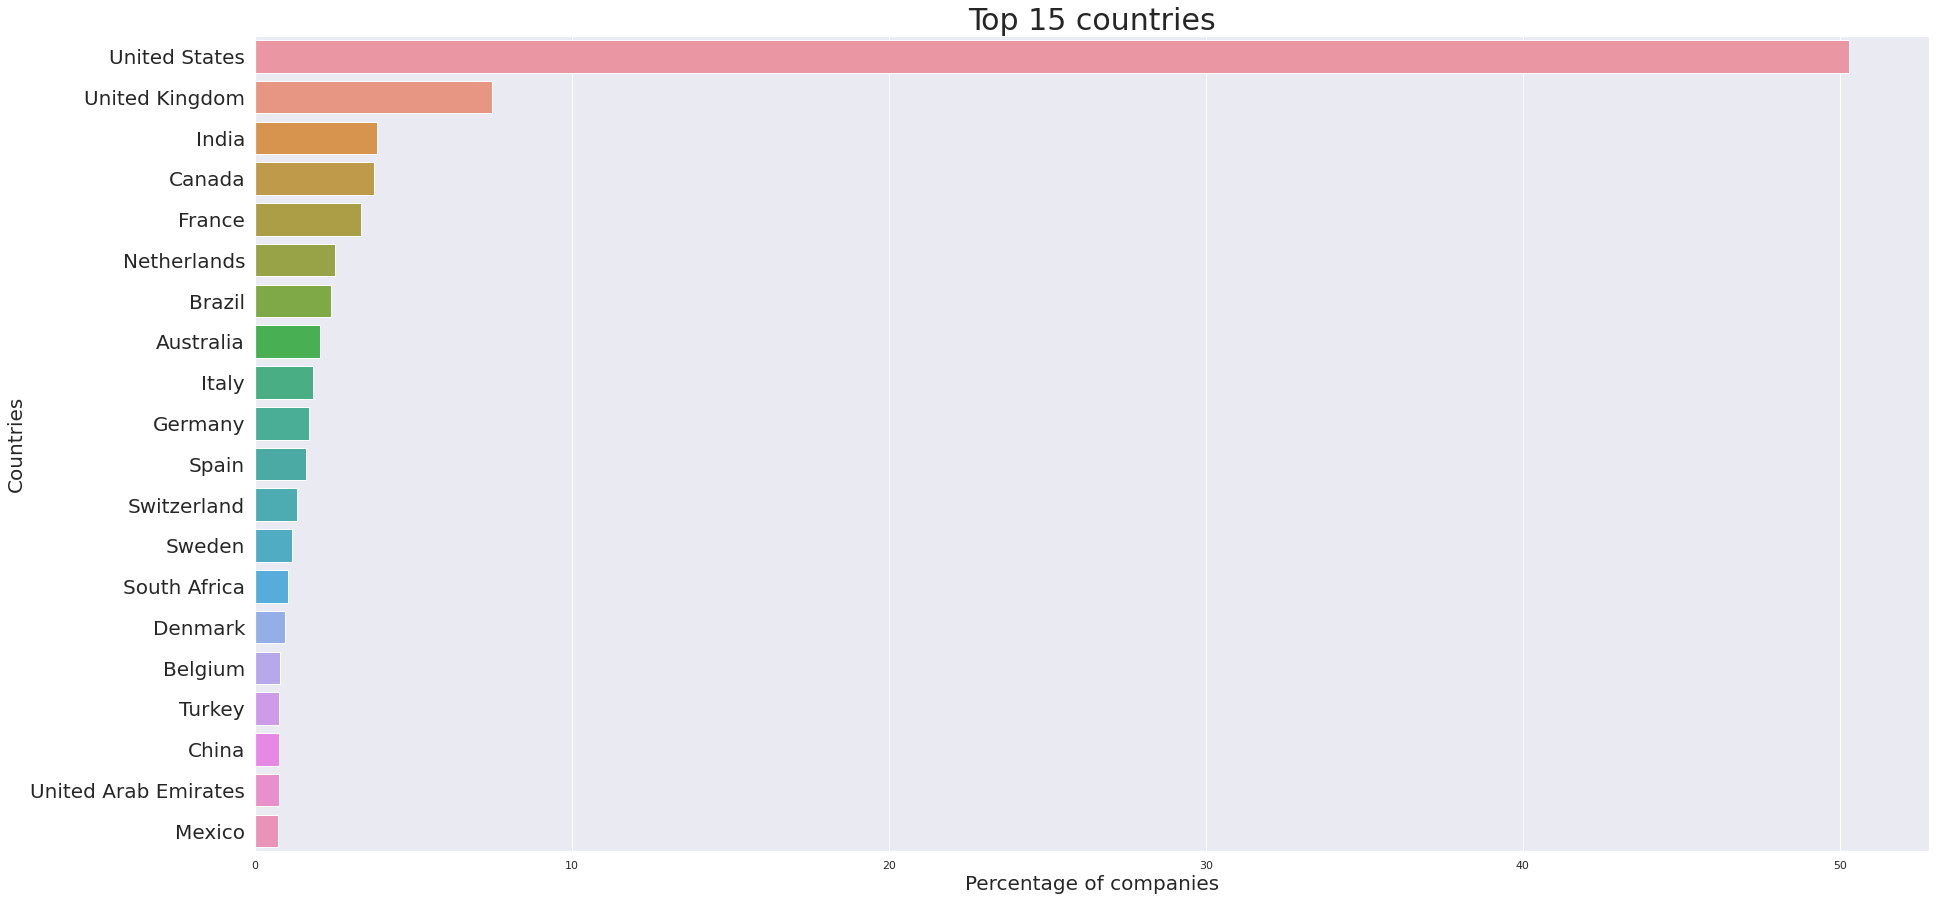

In [38]:
country_percentage = sample_df['country'].value_counts() * 100/len(sample_df)
sns.set(style="darkgrid")

# Counttry_count
plt.figure(figsize=(30,15))
plt.yticks(fontsize=20)
sns.barplot(country_percentage.values[:20], country_percentage.index[:20])

plt.title('Top 15 countries',fontsize=30)
plt.ylabel('Countries', fontsize=20)
plt.xlabel('Percentage of companies',fontsize=20)

plt.show();

**Insights from the above chart**
* Us is contributing to 53% of all the 43 countries
* Second highest is Uk which is contributing to nearly 8 %
* India which is 4th highest contributing to 4 % of total companies in the world

Why China is in the 17th position?

Answer - It is because our dataset does not contain the companies information about china.

###  **Analyzing column `['industry']`**

###  **8.What are the top 10 industries around the world?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



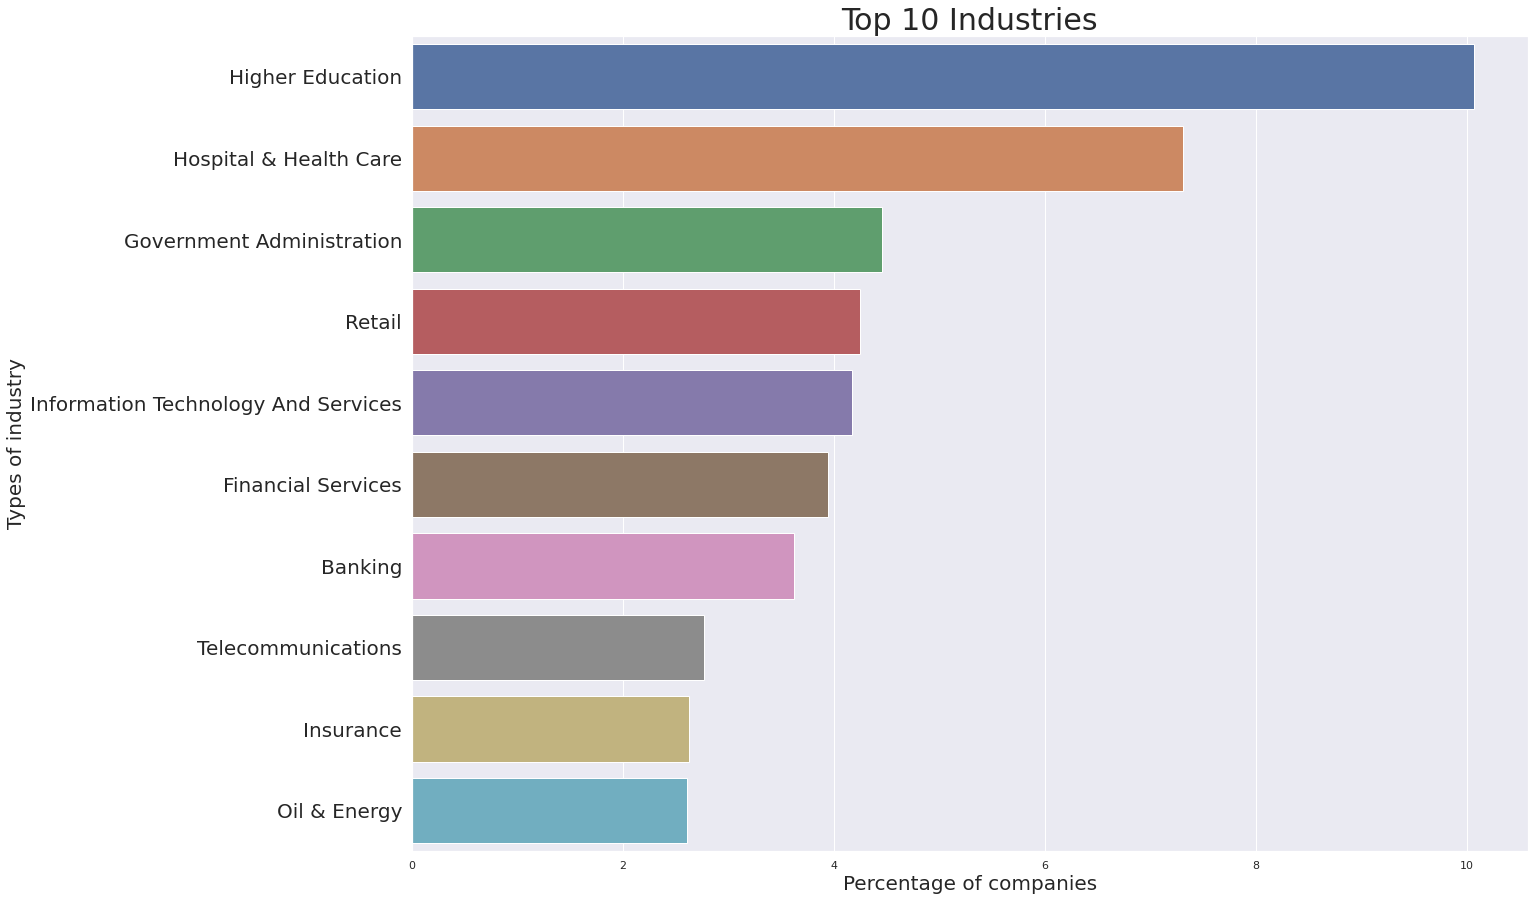

In [39]:
industry_percentage = sample_df['industry'].value_counts() * 100/len(sample_df)
sns.set(style="darkgrid")

# industry_count
plt.figure(figsize=(20,15))
plt.yticks(fontsize=20)
sns.barplot(industry_percentage.values[:10], industry_percentage.index[:10])

plt.title('Top 10 Industries',fontsize=30)
plt.ylabel('Types of industry', fontsize=20)
plt.xlabel('Percentage of companies',fontsize=20)
plt.show();

**Insights frrom the above chart**
* From the chart we can see higher education sector is contributing nearly 10% which is highest followed by hospital and health care which is nearly 7%

* Insurance is contributing around 3 % all over the world.

###  **9.How are the different industries are distributed over the selected countries?**

In [40]:
print("Number of industries are :",len(sample_df['industry'].unique()))

Number of industries are : 141


In [41]:
# Selected industries
industries = ['Higher Education', 'Hospital & Health Care','Information Technology And Services','Financial Services', 'Banking','Insurance','Oil & Energy']
new_industry_df = sample_df.loc[sample_df['industry'].isin(industries)]

# Selected countries
countries = ['Canada','United Kingdom','India','France']
trial = new_industry_df.loc[new_industry_df['country'].isin(countries)]

# Plot a barmode chart
df = trial
fig = px.bar(df, x="country", color="industry",barmode='group')
fig.update_layout(template="none",title='Types of indutries in countries')
fig.show()

**Insights from the above chart**
* From the chart we can see in India `information and technology` is highest

###  **10.Visualize the companies Information using choloropleth map.**

* Choropleth maps use color to show how data changes from place to place. These maps allow us to visualize information tied to geography, and to compare and analyze data from across locations.
* Here in our dataset, we will use column country to plot the map

Requiremnts to plot Map
* GeoJson - A GeoJSON file format is an open standard format that contains geospatial data.
* Check all the country names from our data is matching with the GeoJSON data

In [42]:
# Geojson file
countries_geojson = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'

# Let's count the number of countries
country_counts = sample_df.country.value_counts()
country_counts_df = pd.DataFrame({ 'Country': country_counts.index, 'Count': country_counts.values})
country_counts_df["Country"]=country_counts_df["Country"].str.strip()

# Change the few name of countries according to our geojson file
country_counts_df['Country'] =country_counts_df['Country'].replace(['United States','Papua New Guinea',
                                                                    'United Kingdom','New Zealand',
                                                                    'Saudi Arabia','Tanzania','Czechia','Serbia','Sri lanka', 'South Africa',
                                                                    'Costa rica','French polynesia','South sudan','Trinidad and tobago','Sierra leone'],
                                                                   ['United States of America','Papua New Guinea',
                                                                    'United Kingdom','New Zealand',
                                                                    'Saudi Arabia','United Republic of Tanzania','Czech Republic',
                                                                    'Republic of Serbia','Sri Lanka','South Africa',
                                                                    'Costa Rica','French Polynesia',' South Sudan',
                                                                    ' Trinidad and Tobago',' Sierra Leone'])

import folium # Importing folium library
m = folium.Map(location=[30, 0], zoom_start=2)


folium.Choropleth(
    geo_data=countries_geojson,
    data=country_counts_df,
    columns=["Country", "Count"],
    key_on="feature.properties.name",
    threshold_scale=[0,200,500,1000,6000],
    fill_color="OrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Companies",
).add_to(m)

m

* Lighter shades tells us that there is few companies in that country.
* Darker shades tells us that there is more companies in that country.

###  **11.Which country has more number of IT industries with more employees?**

Here we will use column `country`, `current_employee_estimate`, and `industry`

In [43]:
# We are only interested in companies, where at least one current employee is presented
df_companies = sample_df[sample_df['current_employee_estimate'] > 0]

* Not only information and technology contribute to IT industries So, 
Let's get full list of industries and manually selecting those related to IT (my selection is not very critical and is subjective):

In [ ]:
#sorted(set(df_companies.industry.tolist()))

In [ ]:
# Selected industries whcich is contributin to IT industries
IT_industries = [
 'Animation',
 'Biotechnology',
 'Computer & Network Security',
 'Computer Games',
 'Computer Hardware',
 'Computer Networking',
 'Computer Software',
 'Consumer Electronics',
 'Defense & Space',
 'E-Learning',
 'Industrial Automation',
 'Information Services',
 'Information Technology And Services',
 'Internet',
 'Mechanical Or Industrial Engineering',
 'Program Development',
 'Telecommunications',
 'Wireless'
]

In [ ]:
# Crate a dataframe for the IT industries
it_frame = df_companies[df_companies.industry.isin(IT_industries)]

# Let's plot a Bar plot
it_df = it_frame.copy()

it_df = it_df.sort_values('current_employee_estimate', ascending=False)

it_df = it_df[:100]

fig = px.histogram(it_df, x='country', y='current_employee_estimate',
                        
                          color='country', 
                          hover_name='country')

fig.update_layout(template='plotly_dark',
                 title="IT industry in different country",
                 yaxis_title="Number of IT industrues",
                 xaxis_title="Country", 
                 legend_title ='Name of Country')
fig.show()

**Insights from the above chart**
* From the chart, we can say US IT industries having most employee which is nearly 6 million.
* India's IT industry is the second-largest around the world where the employment is high.

###  **12.Which city has more number of IT industries with more number of employees within the country?**

In [ ]:
# Let's split the column locality to get the city name and state name in two different column
sample_df[['city','state','country']] = sample_df.locality.apply(lambda x: pd.Series(str(x).split(", ")))

# Convert strings in the Series/Index to titlecase.
sample_df.country = sample_df.country.str.title()
sample_df.city = sample_df.city.str.title()
sample_df.state = sample_df.state.str.title()

# We are only interested in companies, where at least one current employee is presented
df_companies = sample_df[sample_df['current_employee_estimate'] > 0]

# Crate a dataframe for the IT industries
it_frame = df_companies[df_companies.industry.isin(IT_industries)]

# Let's plot a Bar plot
it_df = it_frame.copy()
it_df = it_df.sort_values('total_employee_estimate', ascending=False)

it_df = it_df[:100]

fig = px.histogram(it_df, x='city', y='total_employee_estimate',
                        
                          color='country', 
                          hover_name='city')

fig.update_layout(template='plotly_dark',
                 title="IT Industry in different cities",
                 yaxis_title="Total out of 100",
                 xaxis_title="Cities around the world", 
                 legend_title ='Name of Country')
fig.show()

**Insights from the above chart**
* From the chart, we can say India's IT industry is evolved around the cities Banglore which is highest followed by Bombay, Noida, Pune, Hyderabad, and Gurgaon.

### **13.Create a TreeMap for country, state and city**

What is a treemap?

- Treemaps display hierarchical (tree-structured) data as a set of nested rectangles. Each branch of the tree is given a rectangle, which is then tiled with smaller rectangles representing sub-branches. A leaf node's rectangle has an area proportional to a specified dimension of the data.[1] Often the leaf nodes are colored to show a separate dimension of the data.
- Our dataset contains column country, state and city to see the visulas of tree map.

In [ ]:
# Plot a treemap
fig = px.treemap(sample_df,
               path=["country","state","city"],
               values= "current_employee_estimate",
               color_continuous_scale="RdBu")
fig.show()

**Insights from the above treemap**
- By clcicking on each contry it will show the state of that country and again by clicking on that state it will show the city.
- 60% of data is representing Unites States in terms of their current employee estimate

## **Conclusion**

*  Most of the countries is established around 1946 to 2006 around the world.
* Most of the companies are established in the United States followed by UK and India.
* We can analyze that IBM, tata, Accenture are having more companies.
Us is contributing to 53% of all the 43 countries
* Second highest is Uk which is contributing to nearly 8 %
* India which is 4th highest contributing to 4 % of total companies in the world
* We are having data limitations regarding china It does not contain more companies' information about china.
* From the chart we can see higher education sector is contributing nearly 10% which is highest followed by hospital and health care which is nearly 7%

* Insurance is contributing around 3 % all over the world.
* From the chart, we can see in India information and technology is highest.

## **Future Work**

* Visualize the cities where industries are located around the world
* Get the colorful map and try different columns.
* We can do stratified sampling for every country
* More analysis can be drawn out from this dataset. As we haven't used all columns in analaysis. If we can combine more columns , more interesting result will come out.
* We can also combine with some other interesting dataset .

## **References**

* Plotly Documentation: https://plotly.com/python/
* EDA from scratch by Aakash NS: https://www.youtube.com/watch?v=kLDTbavcmd0&t=5315s
* Another EDA video from Aakash NS: https://www.youtube.com/watch?v=B4GbWjUFUGk
* Aakash N S. Analyzing Tabular Data with Pandas, 2021. https://jovian.ai/aakashns/python-pandas-data-analysis
* Pandas Documentation: https://pandas.pydata.org/docs/

In [48]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pankajthakur3999/eda-company-datasets


'https://jovian.ai/pankajthakur3999/eda-company-datasets'